In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

2025-06-05 04:55:08.789167: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 04:55:09.019565: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-05 04:55:09.136714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749099309.426273    6108 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749099309.524945    6108 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749099310.173636    6108 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
#load data
data = keras.datasets.imdb

#load the 10000 most frequently used thru out the whole dataset.
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=10000)

#display data
print(train_data[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
#map the words
word_index = data.get_word_index()

word_index = {word:(num+3) for word, num in word_index.items()} #keys == words, val == integers
word_index["<PAD>"] = 0 #will be used later to set length for all data
word_index["<START>"] = 1
word_index["<UNKS>"] = 2
word_index["<UNUSED>"] = 3

#swap positions of values to keys. Meaning instead of using numbers pointing to words,
# we have words point to numbers
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
#decode to readable english
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, "?") for i in text])

print(decode_review(train_data[0]))

<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNKS> is an amazing actor and now the same being director <UNKS> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNKS> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNKS> to the two little boy's that played the <UNKS> of norman and paul they were just brilliant children are often left out of the <UNKS> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised f

In [12]:
#check length of 2 reviews
print(len(train_data[0]), len(test_data[1]))

#truncate data
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], 
                                                        padding="post", maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"],
                                                       padding="post", maxlen=256)

256 256


In [13]:
#check length of 2 reviews again after truncating
print(len(test_data[0]), len(test_data[1]))

256 256


In [14]:
#build model
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid")) #numbers will be between 0-1

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_1      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
#compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

#validate the model

#take up to 10000th reviews
x_val = train_data[:10000]
y_val = train_labels[:10000]

x_train = train_data[10000:]
y_train = train_labels[10000:]

#train the model by passing the dataset object to the fit method.
#batch_size: how many reviews we will load
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)

#evaluate model
result = model.evaluate(test_data, test_labels)

print(result)

Epoch 1/40


2025-06-05 04:57:15.031072: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5130 - loss: 0.6925 - val_accuracy: 0.5264 - val_loss: 0.6891
Epoch 2/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5650 - loss: 0.6861 - val_accuracy: 0.6778 - val_loss: 0.6775
Epoch 3/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6817 - loss: 0.6707 - val_accuracy: 0.6738 - val_loss: 0.6564
Epoch 4/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7147 - loss: 0.6457 - val_accuracy: 0.6957 - val_loss: 0.6267
Epoch 5/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7496 - loss: 0.6102 - val_accuracy: 0.7810 - val_loss: 0.5848
Epoch 6/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7973 - loss: 0.5638 - val_accuracy: 0.8099 - val_loss: 0.5407
Epoch 7/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8218 - loss: 0.5197 - val_accuracy: 0.8218 - val_loss: 0.4975
Epoch 8/40
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8402 - loss: 0.4730 - val_accuracy: 0.8367 - val_loss: 0.

2025-06-05 04:57:36.783172: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 25600000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8733 - loss: 0.3092
[0.3142392635345459, 0.8711199760437012]


In [16]:
#test model
test_review = test_data[0]
predict = model.predict(np.array([test_review]))
print("Review: " + decode_review(test_review))
print("Prediction: " + str(predict[0]))
print("Actual: " + str(test_labels[0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
Review: <START> please give this one a miss br br <UNKS> <UNKS> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNKS> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <

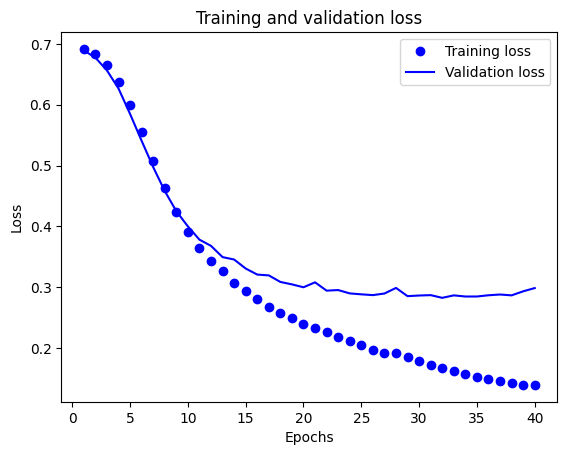

In [17]:
#Create a plot of accuracy and loss over time
history_dict = fitModel.history
history_dict.keys()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# "b" is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

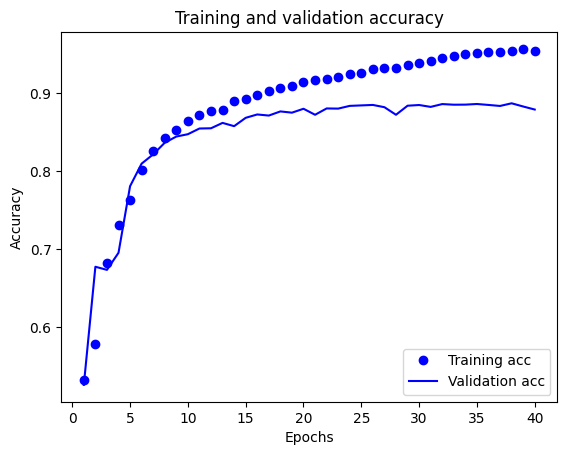

In [18]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()